# 🏠 Keras + Pandas Tutorial: Real Estate Price Prediction

Learn to combine **Pandas** (data manipulation) with **Keras** (deep learning) to predict house prices.

## Learning Objectives:
1. Load and explore data with Pandas
2. Preprocess data for machine learning
3. Build a neural network with Keras
4. Train, evaluate, and make predictions

In [8]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported!")

Libraries imported!


In [9]:
# Step 2: Load Data with Pandas
df = pd.read_csv('real_estate_data.csv')
print(f"Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset: 100 rows, 16 columns


,property_id,bedrooms,bathrooms,sqft,lot_size,year_built,garage_spaces,property_type,location,has_pool,has_fireplace,distance_to_city_km,school_rating,crime_rate,median_income,price
0,1,3,2,1850,0.25,2005,2,Single Family,Suburban,0,1,12.5,8,2.3,75000,425000
1,2,4,3,2400,0.35,2010,2,Single Family,Suburban,1,1,15.2,9,1.8,85000,575000
2,3,2,1,950,0.00,1998,1,Condo,Urban,0,0,3.2,7,4.5,55000,225000
3,4,5,4,3200,0.50,2018,3,Single Family,Suburban,1,1,18.5,9,1.2,95000,785000
4,5,2,2,1100,0.00,2015,1,Condo,Urban,0,0,2.8,8,3.8,62000,295000


In [10]:
# Basic info and statistics
df.info()
print("\n" + "="*50)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          100 non-null    int64  
 1   bedrooms             100 non-null    int64  
 2   bathrooms            100 non-null    int64  
 3   sqft                 100 non-null    int64  
 4   lot_size             100 non-null    float64
 5   year_built           100 non-null    int64  
 6   garage_spaces        100 non-null    int64  
 7   property_type        100 non-null    object 
 8   location             100 non-null    object 
 9   has_pool             100 non-null    int64  
 10  has_fireplace        100 non-null    int64  
 11  distance_to_city_km  100 non-null    float64
 12  school_rating        100 non-null    int64  
 13  crime_rate           100 non-null    float64
 14  median_income        100 non-null    int64  
 15  price                100 non-null    int6

,property_id,bedrooms,bathrooms,sqft,lot_size,year_built,garage_spaces,has_pool,has_fireplace,distance_to_city_km,school_rating,crime_rate,median_income,price
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,3.330000,2.490000,2065.150000,0.292900,2008.710000,1.880000,0.370000,0.650000,12.16150,7.720000,2.616400,76470.000000,5.140500e+05
std,29.011492,1.371094,1.105496,1042.753604,0.257094,8.772426,1.094338,0.485237,0.479372,6.93618,1.005842,1.397919,18064.673378,2.702490e+05
min,1.000000,1.000000,1.000000,550.000000,0.000000,1987.000000,0.000000,0.000000,0.000000,1.50000,5.000000,0.800000,42000.000000,1.350000e+05
25%,25.750000,2.000000,2.000000,1115.000000,0.000000,2002.000000,1.000000,0.000000,0.000000,4.07500,7.000000,1.515000,65750.000000,3.242500e+05
50%,50.500000,3.000000,2.000000,1790.000000,0.250000,2011.000000,2.000000,0.000000,1.000000,13.00000,8.000000,2.265000,78000.000000,4.565000e+05
75%,75.250000,4.000000,3.000000,2865.000000,0.470000,2016.000000,3.000000,1.000000,1.000000,17.25000,8.000000,3.662500,90000.000000,6.975000e+05
max,100.000000,6.000000,5.000000,4500.000000,1.000000,2020.000000,4.000000,1.000000,1.000000,25.00000,9.000000,5.800000,112000.000000,1.250000e+06


Missing values: 0


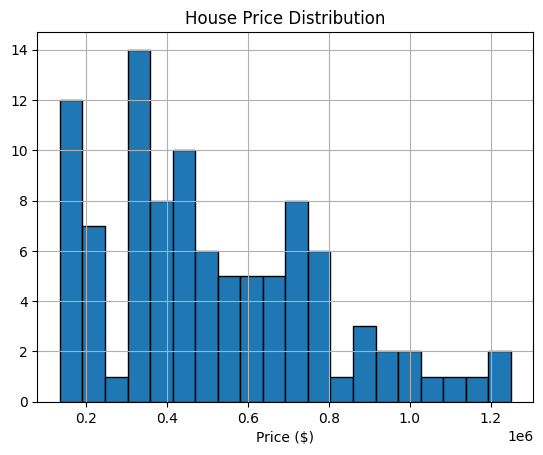

In [11]:
# Step 3: Exploratory Data Analysis
# Check missing values
print("Missing values:", df.isnull().sum().sum())

# Price distribution
df['price'].hist(bins=20, edgecolor='black')
plt.title('House Price Distribution')
plt.xlabel('Price ($)')
plt.show()

In [12]:
# Correlation with price
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['price'].sort_values(ascending=False)
print("Correlation with Price:")
print(correlations)

Correlation with Price:
price                  1.000000
sqft                   0.990486
lot_size               0.984859
bathrooms              0.967353
median_income          0.966936
bedrooms               0.951700
garage_spaces          0.941800
distance_to_city_km    0.937768
year_built             0.773741
has_pool               0.737860
has_fireplace          0.727987
school_rating          0.555068
property_id            0.079183
crime_rate            -0.895931
Name: price, dtype: float64


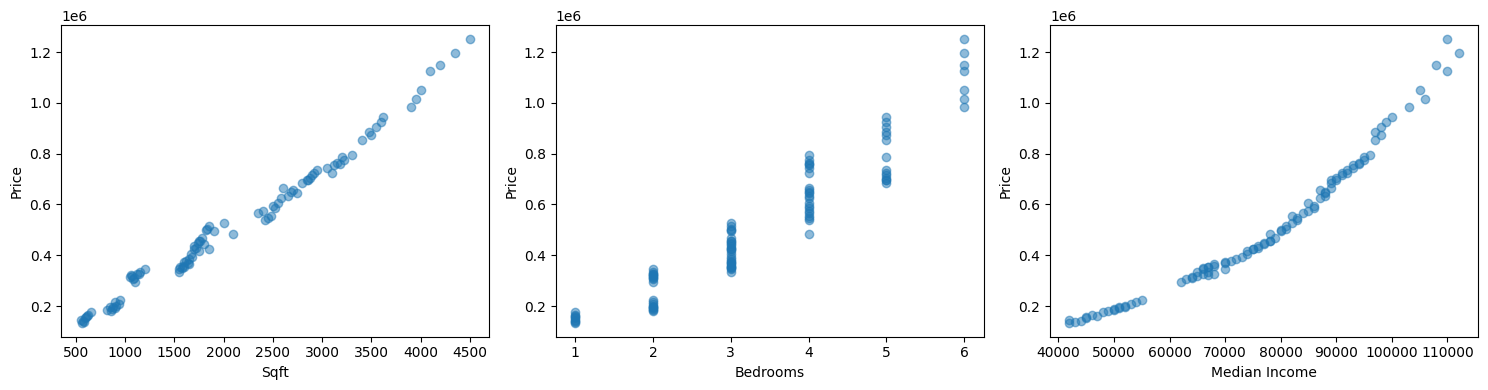

In [13]:
# Key feature scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].scatter(df['sqft'], df['price'], alpha=0.5)
axes[0].set_xlabel('Sqft'); axes[0].set_ylabel('Price')
axes[1].scatter(df['bedrooms'], df['price'], alpha=0.5)
axes[1].set_xlabel('Bedrooms'); axes[1].set_ylabel('Price')
axes[2].scatter(df['median_income'], df['price'], alpha=0.5)
axes[2].set_xlabel('Median Income'); axes[2].set_ylabel('Price')
plt.tight_layout()
plt.show()

In [14]:
# Step 4: Data Preprocessing
df_processed = df.copy()
df_processed = df_processed.drop('property_id', axis=1)

# Encode categorical variables
categorical_cols = ['property_type', 'location']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

property_type: {'Condo': 0, 'Single Family': 1, 'Townhouse': 2}
location: {'Rural': 0, 'Suburban': 1, 'Urban': 2}


In [15]:
# Separate features and target
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training: {X_train.shape[0]} | Testing: {X_test.shape[0]}")

# Feature scaling (IMPORTANT for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled!")

Training: 80 | Testing: 20
Features scaled!


In [16]:
# Step 5: Build Keras Neural Network
n_features = X_train_scaled.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Step 6: Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 355942498304.0000 - mae: 516669.8125 - val_loss: 279895179264.0000 - val_mae: 486625.5000
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 340604125184.0000 - mae: 524663.1250 - val_loss: 279894884352.0000 - val_mae: 486625.1875
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 372684587008.0000 - mae: 542598.1875 - val_loss: 279894687744.0000 - val_mae: 486624.9688
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 368949100544.0000 - mae: 535106.3750 - val_loss: 279894556672.0000 - val_mae: 486624.8438
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 406412722176.0000 - mae: 555314.5625 - val_loss: 279894491136.0000 - val_mae: 486624.7500
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 329929359360.0000 - mae: 501666.4062 - val_loss: 279894425600.0000 - val_mae: 486624.6875
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 368454828032.0000 - mae: 534253.8125 - val_loss: 27989

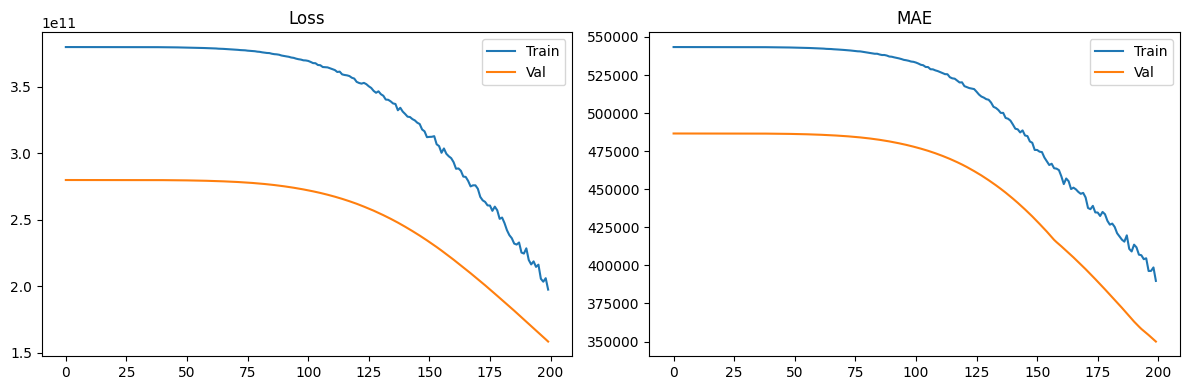

In [18]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history['loss'], label='Train')
axes[0].plot(history.history['val_loss'], label='Val')
axes[0].set_title('Loss'); axes[0].legend()
axes[1].plot(history.history['mae'], label='Train')
axes[1].plot(history.history['val_mae'], label='Val')
axes[1].set_title('MAE'); axes[1].legend()
plt.tight_layout()
plt.show()

In [19]:
# Step 7: Evaluate Model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: ${test_mae:,.2f}")
print(f"Predictions are off by ~${test_mae:,.0f} on average")

Test MAE: $312,763.84
Predictions are off by ~$312,764 on average


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


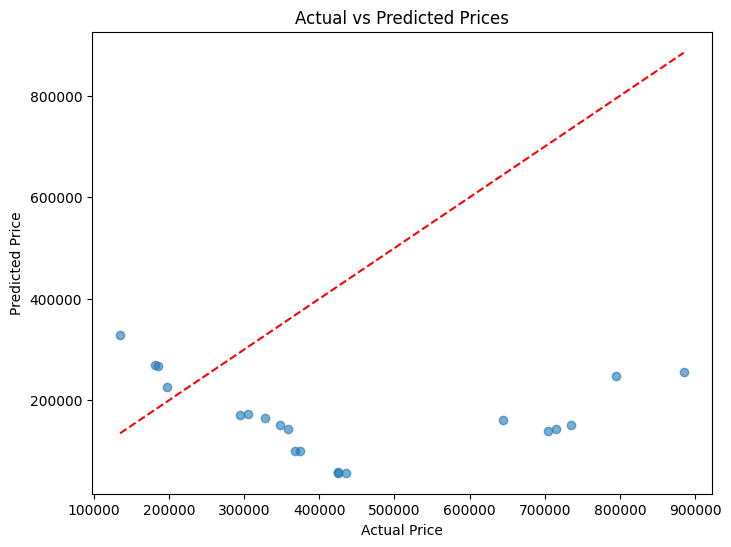

In [20]:
# Actual vs Predicted plot
y_pred = model.predict(X_test_scaled).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

In [21]:
# Step 8: Make Predictions on New Data
new_house = pd.DataFrame({
    'bedrooms': [4], 'bathrooms': [3], 'sqft': [2500], 'lot_size': [0.35],
    'year_built': [2015], 'garage_spaces': [2], 'property_type': ['Single Family'],
    'location': ['Suburban'], 'has_pool': [1], 'has_fireplace': [1],
    'distance_to_city_km': [15.0], 'school_rating': [8], 'crime_rate': [2.0],
    'median_income': [85000]
})

# Preprocess new data (same as training)
new_processed = new_house.copy()
for col in categorical_cols:
    new_processed[col] = label_encoders[col].transform(new_processed[col])
new_scaled = scaler.transform(new_processed)

# Predict
price = model.predict(new_scaled)[0][0]
print(f"Predicted Price: ${price:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Price: $124,485.19


In [22]:
# Step 9: Save Model
model.save('house_price_model.keras')
print("Model saved!")

# Load model (for future use)
from tensorflow.keras.models import load_model
loaded_model = load_model('house_price_model.keras')
print("Model loaded and ready to use!")

Model saved!
Model loaded and ready to use!


## 📝 Key Takeaways

### Pandas Functions Used:
- `pd.read_csv()` - Load CSV data
- `df.head()`, `df.info()`, `df.describe()` - Explore data
- `df.drop()` - Remove columns
- `df.select_dtypes()` - Select column types

### Keras Functions Used:
- `Sequential()` - Create model
- `Dense()` - Add neural network layers
- `Dropout()` - Prevent overfitting
- `model.compile()` - Configure training
- `model.fit()` - Train model
- `model.evaluate()` - Test performance
- `model.predict()` - Make predictions